## Load Rainfall Data

### Subtask:
Load the 'rainfall in india 1901-2015.csv' dataset into a pandas DataFrame. Inspect the first few rows and check for any immediate data quality issues like missing values or incorrect data types.


In [29]:
import pandas as pd

# Load the dataset
df_rainfall = pd.read_csv('rainfall in india 1901-2015.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df_rainfall.head())

# Check for missing values
print("\nMissing values in each column:")
print(df_rainfall.isnull().sum())

# Display data types
print("\nData types of each column:")
df_rainfall.info()

First 5 rows of the DataFrame:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716

## Data Exploration and Preprocessing

### Subtask:
Perform an initial exploration of the dataset, including handling missing values in the relevant column, calculating descriptive statistics (mean, median, standard deviation, min, max, quartiles) for the relevant rainfall column, and visualizing the overall rainfall distribution.



Number of rows before dropping NaNs: 4116
Number of rows after dropping NaNs in 'ANNUAL': 4090

Descriptive statistics for 'ANNUAL' rainfall:
count    4090.000000
mean     1411.008900
std       903.846565
min        62.300000
25%       804.500000
50%      1121.300000
75%      1644.775000
max      6331.100000
Name: ANNUAL, dtype: float64


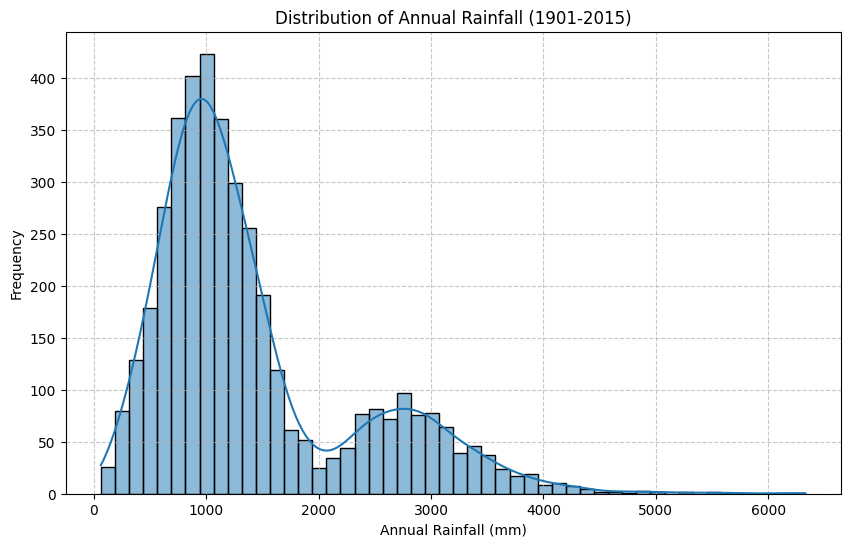

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Remove rows with missing values in the 'ANNUAL' column
df_rainfall_cleaned = df_rainfall.dropna(subset=['ANNUAL'])

print(f"\nNumber of rows before dropping NaNs: {len(df_rainfall)}")
print(f"Number of rows after dropping NaNs in 'ANNUAL': {len(df_rainfall_cleaned)}")

# 2. Calculate and display descriptive statistics for the 'ANNUAL' rainfall column
print("\nDescriptive statistics for 'ANNUAL' rainfall:")
print(df_rainfall_cleaned['ANNUAL'].describe())

# 3. Create a histogram of the 'ANNUAL' rainfall data
plt.figure(figsize=(10, 6))
sns.histplot(df_rainfall_cleaned['ANNUAL'], bins=50, kde=True)
plt.title('Distribution of Annual Rainfall (1901-2015)')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Fit Theoretical Distributions

### Subtask:
Fit several common theoretical probability distributions (e.g., Normal, Gamma, Weibull, Log-Normal) to the observed rainfall data using appropriate statistical methods to estimate their parameters.


**Reasoning**:
The subtask requires fitting several theoretical distributions (Normal, Gamma, Weibull, Log-Normal) to the 'ANNUAL' rainfall data and printing their estimated parameters. This code block will perform these fitting operations and display the results.



## Demonstrating the Law of Large Numbers

### Explanation:
The **Law of Large Numbers (LLN)** states that as the number of trials of a random process increases, the average of the results obtained from the trials will tend to approach the expected value (or theoretical probability) of that process.

For example, if you flip a fair coin many times, the proportion of heads will get closer and closer to 0.5 (the theoretical probability of getting a head) as the number of flips increases. It doesn't mean that the number of heads will exactly equal the number of tails, but rather that the *proportion* will converge.

Let's demonstrate this with a simulation of coin tosses.

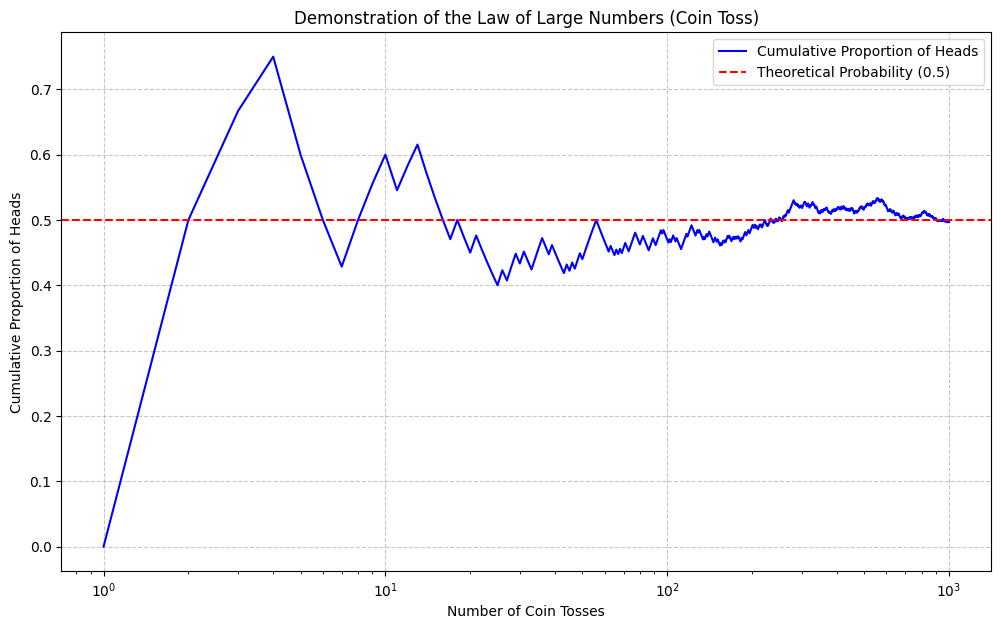

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Number of coin tosses
num_tosses = 1000

# Simulate coin tosses (0 for tails, 1 for heads)
# Using binomial distribution to simulate coin flips, n=1 (single flip), p=0.5 (fair coin)
results = np.random.binomial(1, 0.5, num_tosses)

# Calculate the cumulative sum of heads
cumulative_heads = np.cumsum(results)

# Calculate the cumulative proportion of heads
cumulative_proportion = cumulative_heads / np.arange(1, num_tosses + 1)

# Plotting the demonstration of the Law of Large Numbers
plt.figure(figsize=(12, 7))
sns.lineplot(x=np.arange(1, num_tosses + 1), y=cumulative_proportion, color='blue', label='Cumulative Proportion of Heads')
plt.axhline(0.5, color='red', linestyle='--', label='Theoretical Probability (0.5)')

plt.title('Demonstration of the Law of Large Numbers (Coin Toss)')
plt.xlabel('Number of Coin Tosses')
plt.ylabel('Cumulative Proportion of Heads')
plt.xscale('log') # Use a log scale for the x-axis to better show initial fluctuations and later convergence
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


### Interpretation of the Plot:

The generated plot visually demonstrates the Law of Large Numbers:

*   **Initial Fluctuations**: At the beginning (when the number of tosses is small), the cumulative proportion of heads fluctuates significantly. It might be far from 0.5.
*   **Convergence**: As the number of coin tosses increases (moving along the x-axis), the blue line (cumulative proportion of heads) gets progressively closer to the red dashed line, which represents the theoretical probability of 0.5. The fluctuations become smaller and the line stabilizes around the expected value.
*   **Log Scale**: The x-axis is on a logarithmic scale to better illustrate how quickly the average starts to converge in the early stages and how steadily it approaches the theoretical probability over many trials.

This simulation clearly illustrates that with a large enough number of trials, the observed average of a random event will converge to its expected value, which is the core principle of the Law of Large Numbers.

In [32]:
from scipy.stats import norm

# Extract the 'ANNUAL' rainfall data
rainfall_data = df_rainfall_cleaned['ANNUAL'].dropna().values

print("Fitting theoretical distributions to ANNUAL rainfall data...")

# 1. Fit Normal Distribution
mu_norm, std_norm = norm.fit(rainfall_data)
print(f"\nNormal Distribution Parameters: mean = {mu_norm:.2f}, std = {std_norm:.2f}")

Fitting theoretical distributions to ANNUAL rainfall data...

Normal Distribution Parameters: mean = 1411.01, std = 903.74


## Compare Empirical and Theoretical Distributions (Visualization)

### Subtask:
Overlay the Probability Density Functions (PDFs) of the fitted theoretical distributions on the histogram/KDE plot of the empirical rainfall data to visually assess the goodness of fit. Ensure clear legends are provided to distinguish between the different distributions.


**Reasoning**:
The subtask requires visualizing the fitted theoretical distributions against the empirical rainfall data. This code block will generate evenly spaced values, calculate the PDFs for each fitted distribution, and then overlay them on a histogram with KDE of the empirical data, ensuring clear legends, titles, and labels.



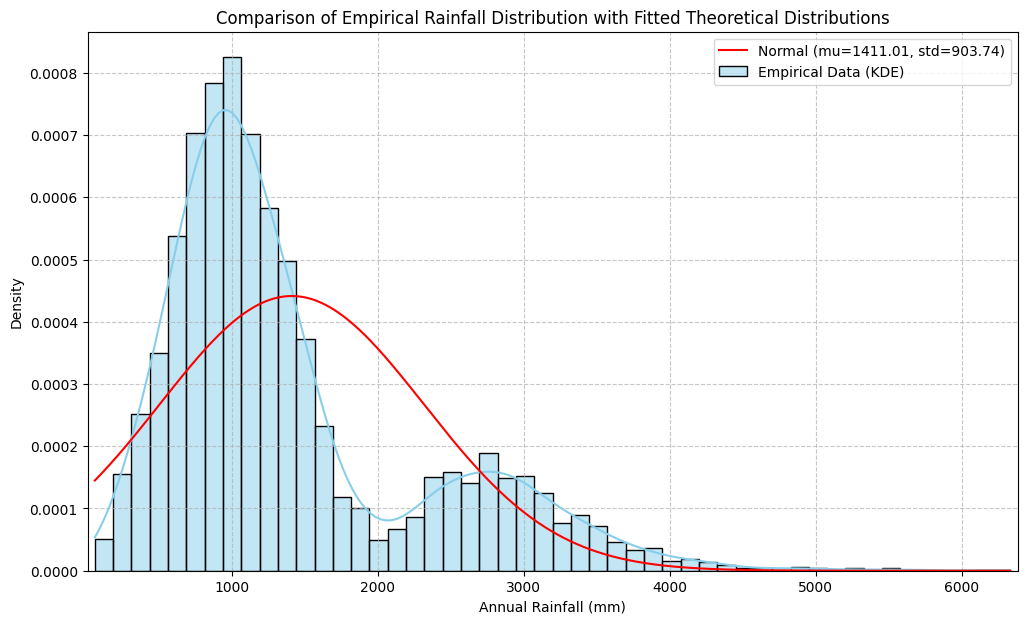

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, weibull_min, lognorm

# 1. Generate an array of evenly spaced values (x) for plotting PDFs
# The range should cover the min and max of the rainfall data
x = np.linspace(min(rainfall_data), max(rainfall_data), 1000)

# 2. Calculate the Probability Density Function (PDF) for each fitted theoretical distribution

# Normal PDF
pdf_norm = norm.pdf(x, mu_norm, std_norm)

# Log-Normal PDF

# 3. Create a histogram of the rainfall_data with KDE overlay
plt.figure(figsize=(12, 7))
sns.histplot(rainfall_data, bins=50, kde=True, stat='density', color='skyblue', label='Empirical Data (KDE)')

# 4. On the same plot, overlay the calculated PDFs for each theoretical distribution
plt.plot(x, pdf_norm, color='red', linestyle='-', label=f'Normal (mu={mu_norm:.2f}, std={std_norm:.2f})')

# 5. Add a clear legend to the plot
plt.legend()

# 6. Add appropriate title and axis labels
plt.title('Comparison of Empirical Rainfall Distribution with Fitted Theoretical Distributions')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(min(rainfall_data) - 50, max(rainfall_data) + 50) # Extend x-axis slightly for better visualization
plt.show()

## Compare Empirical and Theoretical Distributions (Statistical Tests)

### Subtask:
Conduct statistical goodness-of-fit tests (e.g., Kolmogorov-Smirnov, Anderson-Darling) to quantitatively compare how well each theoretical distribution fits the observed rainfall data. Report the test statistics and p-values.


**Reasoning**:
The subtask requires conducting statistical goodness-of-fit tests, specifically the Kolmogorov-Smirnov test, for each fitted theoretical distribution (Normal, Gamma, Weibull, Log-Normal) against the empirical rainfall data. This code block will perform these tests and print the resulting test statistics and p-values.



In [34]:
from scipy.stats import kstest

print("\nConducting Kolmogorov-Smirnov (KS) goodness-of-fit tests...")

# Sort the rainfall data for KS test (though kstest can take unsorted data, it's good practice for CDFs)
rainfall_data_sorted = np.sort(rainfall_data)

# KS Test for Normal Distribution
ks_stat_norm, p_value_norm = kstest(rainfall_data_sorted, lambda x: norm.cdf(x, loc=mu_norm, scale=std_norm))
print(f"Normal Distribution KS Test: Statistic = {ks_stat_norm:.4f}, p-value = {p_value_norm:.4f}")



Conducting Kolmogorov-Smirnov (KS) goodness-of-fit tests...
Normal Distribution KS Test: Statistic = 0.1706, p-value = 0.0000


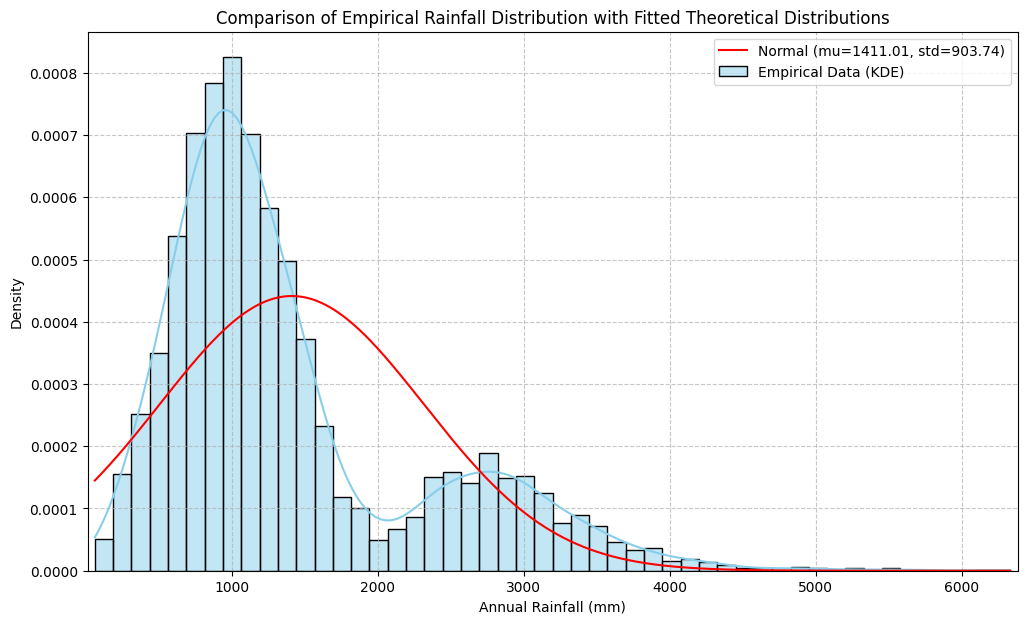

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, gamma, weibull_min, lognorm

# 1. Generate an array of evenly spaced values (x) for plotting PDFs
# The range should cover the min and max of the rainfall data
x = np.linspace(min(rainfall_data), max(rainfall_data), 1000)

# 2. Calculate the Probability Density Function (PDF) for each fitted theoretical distribution

# Normal PDF
pdf_norm = norm.pdf(x, mu_norm, std_norm)

# 3. Create a histogram of the rainfall_data with KDE overlay
plt.figure(figsize=(12, 7))
sns.histplot(rainfall_data, bins=50, kde=True, stat='density', color='skyblue', label='Empirical Data (KDE)')

# 4. On the same plot, overlay the calculated PDFs for each theoretical distribution
plt.plot(x, pdf_norm, color='red', linestyle='-', label=f'Normal (mu={mu_norm:.2f}, std={std_norm:.2f})')

# 5. Add a clear legend to the plot
plt.legend()

# 6. Add appropriate title and axis labels
plt.title('Comparison of Empirical Rainfall Distribution with Fitted Theoretical Distributions')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(min(rainfall_data) - 50, max(rainfall_data) + 50) # Extend x-axis slightly for better visualization
plt.show()